<a href="https://colab.research.google.com/github/wesycool/ML-Airbnb-Price-Prediction/blob/master/3253_ML_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3253 ML Term Project

1 - Introduction
2 - Project Objective
3 - Methodology
4 - Results & Discussion
5 - Challenges during excution
6 - Lession learnt


Predicting airbnb prices in Toronto:
We want to use machine learning to predict what airbnb prices will be in Toronto using supervised learning (random forest). The data set is in csv format--Toronto  listings.csv.gz file compiled June 8 2020 (
http://insideairbnb.com/get-the-data.html). We will use approximately 16 features and 21166 
records. Our motivation is for doing this is that we all like to travel!


In [ ]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-06-08/data/listings.csv.gz")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200608201242,2020-06-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,...,$0.00,4,730,4,4,730,730,4.0,730.0,28 months ago,t,0,0,0,0,2020-06-09,7,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.12
1,8077,https://www.airbnb.com/rooms/8077,20200608201242,2020-06-09,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,NaN,NaN,NaN,No smoking please.,NaN,NaN,https://a0.muscache.com/im/pictures/11780344/1...,NaN,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Toronto, ON, Canada",Downtown Toronto,Waterfront Communities-The Island,...,$0.00,180,365,180,180,365,365,180.0,365.0,21 months ago,t,0,0,0,0,2020-06-09,169,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.28
2,12604,https://www.airbnb.com/rooms/12604,20200608201242,2020-06-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,NaN,NaN,NaN,NaN,no smoking,NaN,NaN,https://a0.muscache.com/im/pictures/5282025/91...,NaN,48239,https://www.airbnb.com/users/show/482

In [ ]:
dataset.columns.tolist()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [ ]:
#dataset['neighbourhood'].value_counts()

In [ ]:
#merge neighbourhood/community with dataset as neighbourhood_group was not available.

neighbour_data = pd.read_excel('https://github.com/wesycool/ML-Airbnb-Price-Prediction/raw/master/Toronto-Neighbour-Community.xlsx')
newDataset = pd.merge(dataset, neighbour_data, how='outer', left_on='neighbourhood_cleansed', right_on='Neighbourhood')

In [ ]:
df=newDataset[['id','name','host_id','host_name','neighbourhood','neighbourhood_cleansed','Community Council.1','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
neighbourhood_cleansed             object
Community Council.1                object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21166 entries, 0 to 21165
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21166 non-null  int64  
 1   name                            21165 non-null  object 
 2   host_id                         21166 non-null  int64  
 3   host_name                       21164 non-null  object 
 4   neighbourhood                   21165 non-null  object 
 5   neighbourhood_cleansed          21166 non-null  object 
 6   Community Council.1             21166 non-null  object 
 7   latitude                        21166 non-null  float64
 8   longitude                       21166 non-null  float64
 9   room_type                       21166 non-null  object 
 10  price                           21166 non-null  object 
 11  minimum_nights                  21166 non-null  int64  
 12  number_of_reviews               

In [ ]:
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            2
neighbourhood                        1
neighbourhood_cleansed               0
Community Council.1                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4235
reviews_per_month                 4235
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#dataset.loc[dataset['neighbourhood'].isna()]

In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'neighbourhood':'Malvern'},inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
neighbourhood_cleansed            0
Community Council.1               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df['price']=df['price'].replace({'\$':''}, regex = True).replace({',':''}, regex = True).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['price'].describe()

count    21166.000000
mean       143.133280
std        279.390428
min          0.000000
25%         64.000000
50%        100.000000
75%        150.000000
max      13419.000000
Name: price, dtype: float64

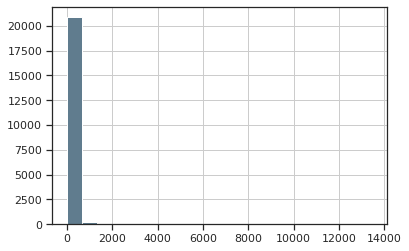

In [ ]:
# Check the distribution of price
hist_price=df["price"].hist(grid=True, bins=20,color='#607c8e')

# most listings have price less than $800

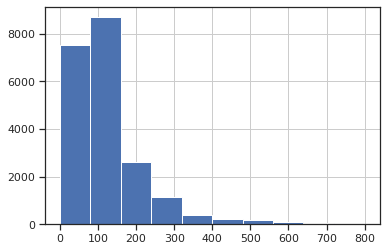

In [ ]:
hist_price1=df["price"][df["price"]<800].hist()

In [ ]:
#most of the listing price actually less than $300, let's check how many listing have price higher than $700/day
df[df["price"]>300]

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,Community Council.1,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,Little Portugal,Toronto and East York,43.64617,-79.42451,Entire home/apt,469.0,4,7,2017-12-04,0.12,1,0
49,5409252,The Full Darling : Entire Home,24175706,Tanya,Little Portugal,Little Portugal,Toronto and East York,43.64776,-79.42476,Entire home/apt,1999.0,1,21,2020-02-01,0.35,5,363
56,5789664,PanAm Perfection,30038219,Garth,Little Portugal,Little Portugal,Toronto and East York,43.64647,-79.42631,Entire home/apt,355.0,5,0,NotReviewed,0.00,1,0
58,5834694,Cozy funky bachelor with patio,2719705,Kimsa,Little Portugal,Little Portugal,Toronto and East York,43.64923,-79.42603,Entire home/apt,1000.0,30,0,NotReviewed,0.00,1,0
80,7329456,"1 bedroom apt, Downtown, Pan Am",38397085,Carl,Parkdale,Little Portugal,Toronto and East York,43.64266,-79.42242,Entire home/apt,400.0,1,0,NotReviewed,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20994,38978120,Best Home 8 bdr for 16+ in Toronto city centre.,217899603,Irina,Victoria Village,Victoria Village,North York,43.72886,-79.31406,Entire home/apt,803.0,1,15,2020-03-08,2.13,2,335
21037,41484561,Minutes away from Humber college,326572538,Riddhi,Mount Olive,Mount Olive-Silverstone-Jamestown,Etobicoke York,43.74365,-79.59258,Private room,2001.0,1,0,NotReviewed,0.00,1,180
21091,19706966,Lathasa Vacation house,41511076,Padmapriya,Port Union,Centennial Scarborough,Scarborough,43.77759,-79.15247,Entire home/apt,450.0,2,2,2018-01-06,0.06,2,310
21158,28464826,Beautifully Decorated House with Parking!,214876092,Kathy,North Park,Rustic,Etobicoke York,43.71235,-79.49629,Entire home/apt,401.0,2,8,2020-03-15,0.39,1,100


In [ ]:
# There are 983 rows(983/21166=4.64%),we can drop those records as outliers. 

df=df[df["price"]<300]

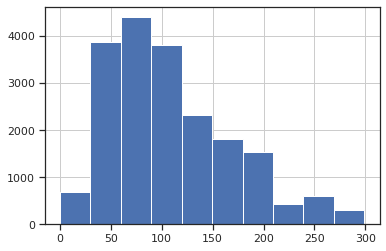

In [ ]:
hist_price2=df['price'].hist()

In [ ]:
# Summary of price statistics

df['price'].describe()

count    19759.000000
mean       108.078091
std         60.297767
min          0.000000
25%         60.000000
50%         98.000000
75%        145.000000
max        299.000000
Name: price, dtype: float64

In [ ]:
#Neighbourhood
df['neighbourhood'].value_counts()

Downtown Toronto          4439
Entertainment District    1067
Niagara                    834
Willowdale                 685
The Annex                  580
                          ... 
Rouge                       11
Markland Woods               8
Manse Valley                 8
Corktown                     5
Toronto Islands              4
Name: neighbourhood, Length: 139, dtype: int64

In [ ]:
dfnh =df.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 150)
len(dfnh["neighbourhood"])

13612

In [ ]:
#df['smart_location'].unique()

In [ ]:
#df.loc[df['smart_location']=='Old Toronto, Canada']

In [ ]:
#df.loc[df['smart_location'].isin(['Toronto, Canada','Toronto , Canada','toronto, Canada', '토론토, Canada','多伦多, Canada','Toronto, , Canada', 'CA, Canada','Toronto , Canada', 'Toronto, Ontario, CA, Canada','Toronto M5S 2L6, Canada',
#       'ONTARIO , Canada',' Toronto, Canada','ON, Canada','Old Toronto, Canada','Ontario, Canada', 'Cabbagetown, Toronto, Canada', 'Toronto., Canada'])]='Toronto'
#df.loc[df['smart_location'].isin(['North York, Toronto, Canada','North York, Canada','North york, Canada','North york - Toronto , Canada','Notrhyork, Canada', 'NORTH YORK, Canada',
#      'North York, Toronto , Canada'])]='North York'
#df.loc[df['smart_location'].isin(['Scarborough, Canada','SCARBOROUGH, Canada','Scarborough , Canada'])]='Scarborough'
#df.loc[df['smart_location'].isin(['Vaughan, Canada','Vaughan , Canada','Vaughn, Canada'])]='Vaughan'
#df.loc[df['smart_location'].isin(['Etobicoke , Canada','Etobicoke, Canada'])]='Etobicoke'
#df.loc[df['smart_location'].isin(['Mississauga, Canada'])]='Mississauga'
#df.loc[df['smart_location'].isin(['York, Canada'])]='York'
#df.loc[df['smart_location'].isin(['Markham, Canada'])]='Markham'
#df.loc[df['smart_location'].isin(['Thornhill , Canada'])]='Thornhill'
#df.loc[df['smart_location'].isin(['Pickering, Canada'])]='Pickering'


In [ ]:
#df['smart_location'].value_counts()

In [ ]:
#average listing price by neighbourhood
n_price=df.groupby("neighbourhood")["price"].mean()
n_price.sort_values(ascending=False)

neighbourhood
Financial District         164.112245
Fashion District           151.095808
Entertainment District     147.393627
Harbourfront               144.852459
Yorkville                  144.539062
                              ...    
Keelesdale                  56.360000
Mount Olive                 55.052632
York University Heights     52.639810
West Hill                   49.289474
Malvern                     44.661157
Name: price, Length: 139, dtype: float64

In [ ]:
### too many neighbourhood value... may need to figure out a way to summarize them. 

In [ ]:
#average listing price by Community Council
cc_price=df.groupby("Community Council.1")["price"].mean()
cc_price.sort_values(ascending=False)

Community Council.1
Toronto and East York    120.752015
Etobicoke York            87.669046
North York                82.170765
Scarborough               71.066480
Name: price, dtype: float64

In [ ]:
#Checking if there are duplicate host_ids and whats is the maximum number of listings per host_id
df_host = df.groupby(["host_id"])


In [ ]:
df_host.size().value_counts().head()

1    10479
2     1474
3      524
4      246
5      113
dtype: int64

In [ ]:
df_host.size().value_counts().tail()

28    1
21    1
29    1
37    1
39    1
dtype: int64

In [ ]:
max(df_host.size())

82

In [ ]:
#Finding the host_id with maximum listings: host id 1919294 have the max listing places:
host_id_counts = df["host_id"].value_counts()
max_host = host_id_counts.idxmax()
df[df["host_id"]==1919294]

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,Community Council.1,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
478,733160,Ultra Modern 2 Bedroom Condo,1919294,Toronto Suite Rentals,Downtown Toronto,Waterfront Communities-The Island,Toronto and East York,43.64022,-79.39595,Entire home/apt,229.0,5,0,NotReviewed,0.00,82,86
482,778990,1B + Office w/ Large Private Patio,1919294,Toronto Suite Rentals,Downtown Toronto,Waterfront Communities-The Island,Toronto and East York,43.64091,-79.39595,Entire home/apt,149.0,5,10,2020-01-01,0.17,82,149
484,790590,Stylish 1 Bedroom Suite + Parking,1919294,Toronto Suite Rentals,Downtown Toronto,Waterfront Communities-The Island,Toronto and East York,43.64091,-79.39595,Entire home/apt,149.0,10,13,2018-05-22,0.16,82,89
492,958586,Furnished 1+GuestRoom unit in Downtown,1919294,Toronto Suite Rentals,Downtown Toronto,Waterfront Communities-The Island,Toronto and East York,43.64071,-79.39706,Entire home/apt,189.0,5,8,2017-03-31,0.10,82,89
496,1019166,1 bedroom + guest room suite w/ parking,1919294,Toronto Suite Rentals,Fashion District,Waterfront Communities-The Island,Toronto and East York,43.64200,-79.39623,Entire home/apt,169.0,5,10,2019-05-25,0.12,82,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,7247740,Spacious Modern 1 BR Condo on Lake,1919294,Toronto Suite Rentals,Mimico,Mimico (includes Humber Bay Shores),Etobicoke York,43.62110,-79.48074,Entire home/apt,169.0,28,7,2020-04-11,0.12,82,97
16145,7410907,Modern 1 Bedroom Condo on Lake 2,1919294,Toronto Suite Rentals,Mimico,Mimico (includes Humber Bay Shores),Etobicoke York,43.62273,-79.48238,Entire home/apt,149.0,5,3,2017-06-16,0.06,82,147
16243,27546827,1 Bedroom + Den Furnished with parking2,1919294,Toronto Suite Rentals,Mimico,Mimico (includes Humber Bay Shores),Etobicoke York,43.62306,-79.48326,Entire home/apt,169.0,5,0,NotReviewed,0.00,82,180
16246,27810457,1 Bedroom Furnished with parking,1919294,Toronto Suite Rentals,Mimico,Mimico (includes Humber Bay Shores),Etobicoke York,43.62424,-79.48425,Entire home/apt,159.0,10,1,2018-08-23,0.05,82,180


In [ ]:
# listing name column
df["name_length"]=df['name'].map(str).apply(len)

print(df["name_length"].max())
print(df["name_length"].min())
print(df["name_length"].idxmax())
print(df["name_length"].idxmin())

254
1
9033
3525


In [ ]:
dataset.at[10722, 'name']

'Beautiful location  Midtown, entire house, plus parking at the most after sought neighbourhood in Toronto. Walk score of a 100!! Steps to super trendy shops &restaurants at Young & Eglinton , minutes to Subway. One bedroom on second floor. Open concept k'

In [ ]:
dataset.at[5824, 'name']

'-'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


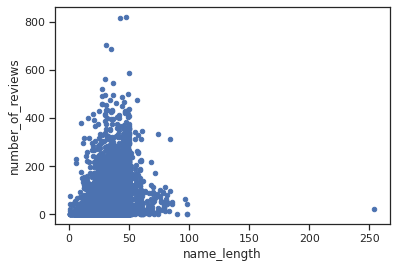

In [ ]:
# if name length has an impact on how much it is noticed. 
#We can assume higher number of reviews mean more people lived there and hence more people "noticed" the listing
#df["name_length"].corr(df["number_of_reviews"])
df.plot.scatter(x="name_length", y ="number_of_reviews" )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


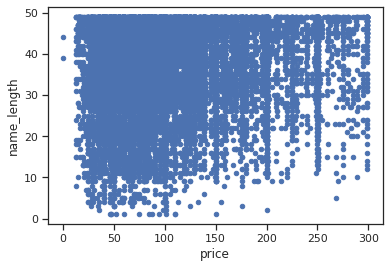

In [ ]:
#There is hardly any relationship there. Lets try between price and name length 
df[df["name_length"]<50].plot.scatter(x="price", y ="name_length")
#df["name_length"].corr(df["price"])

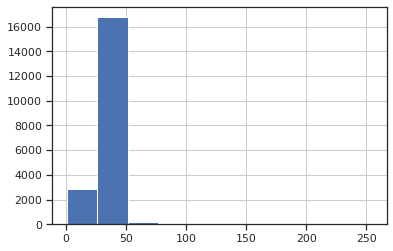

In [ ]:
df.name_length.hist()

In [ ]:
# room_type 
df['room_type'].value_counts()

Entire home/apt    12167
Private room        7151
Shared room          376
Hotel room            65
Name: room_type, dtype: int64

In [ ]:
#minimum nights

df['minimum_nights'].describe()

count    19759.000000
mean         8.995192
std         33.702272
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1125.000000
Name: minimum_nights, dtype: float64

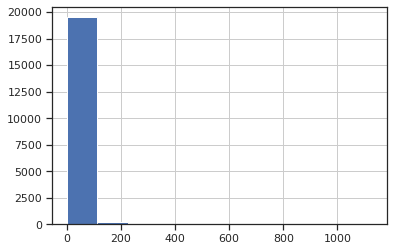

In [ ]:
hist_mn=df["minimum_nights"].hist()
hist_mn

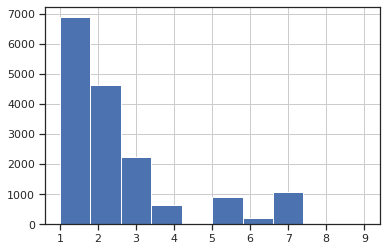

In [ ]:
hist_mn1=df['minimum_nights'][df['minimum_nights']<10].hist()
hist_mn1

In [ ]:
df['minimum_nights'].corr(df['price'])

0.018527568077766152

In [ ]:
#how should we deal with those have very high min nights? 
df[df['minimum_nights']>30]

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,Community Council.1,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_length
89,8227523,New Condo - Queen St West,18599151,Josie,Little Portugal,Little Portugal,Toronto and East York,43.64293,-79.42744,Entire home/apt,99.0,180,118,2019-08-06,2.08,1,217,25
106,9714673,GLÄZ ROOM in Queen West Loft,7309634,Barb,Parkdale,Little Portugal,Toronto and East York,43.64263,-79.42444,Private room,50.0,50,75,2019-09-30,1.43,1,83,28
256,21981590,Classic Victorian in Queen West/Little Portugal,160494223,Fatima,Little Portugal,Little Portugal,Toronto and East York,43.64655,-79.43582,Entire home/apt,174.0,90,0,NotReviewed,0.00,1,0,47
283,23520758,Modern bachelor condo on King Street West,42428958,Michelle,Parkdale,Little Portugal,Toronto and East York,43.64120,-79.42494,Entire home/apt,68.0,150,1,2018-03-31,0.04,1,88,41
325,27906952,Style & Convenience: Loft in Toronto's Queen ...,28613152,Slava,Parkdale,Little Portugal,Toronto and East York,43.64153,-79.42407,Entire home/apt,95.0,168,9,2019-12-15,0.44,1,344,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20783,11674218,Home Away from Home @ Fairview Mall,52080589,Lince,Henry Farm,Henry Farm,Toronto and East York,43.77468,-79.33289,Private room,75.0,360,6,2017-10-02,0.13,1,363,35
20805,32632154,Executive 3 Bed Rm 2 WR Furnished Condo in Tor...,206909844,Delta Suites,Henry Farm,Henry Farm,Toronto and East York,43.77381,-79.32910,Entire home/apt,170.0,180,0,NotReviewed,0.00,2,361,50
21034,36733285,Room in Condo for Couple or Lady Travellers Only,164262824,Dan,Mount Olive,Mount Olive-Silverstone-Jamestown,Etobicoke York,43.74941,-79.58183,Private room,50.0,365,27,2020-03-08,2.76,1,0,49
21120,17332494,3 Separate Bedrooms with 2 washroom,117033563,Niagara,Eglinton East,Eglinton East,Scarborough,43.74195,-79.23777,Private room,109.0,365,40,2019-01-02,1.08,1,180,35


In [ ]:
#availability_365 column
df['availability_365'].describe()

count    19759.000000
mean       123.764209
std        132.403079
min          0.000000
25%          0.000000
50%         87.000000
75%        211.000000
max        365.000000
Name: availability_365, dtype: float64

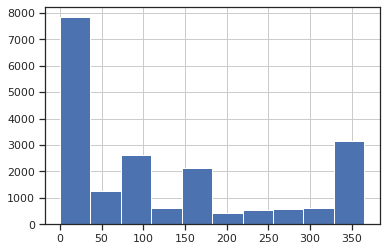

In [ ]:
hist_av=df['availability_365'].hist()
hist_av

### Let us start with basic Linear Regression to create a base line model

In [ ]:
df2 = df[['Community Council.1','neighbourhood','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','name_length']]

In [ ]:
dataset_onehot1 = pd.get_dummies(df2, columns=['Community Council.1',"room_type"], prefix = ['ng',"rt"],drop_first=True)
dataset_onehot1.drop(["neighbourhood"], axis=1, inplace=True)
dataset_onehot1.shape

(19759, 13)

In [ ]:
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']
Y1 = dataset_onehot1["price"]

Splitting into training and testing data

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

### Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)

### R squared value
reg1.score(x_train1, y_train1)

0.33851031733309245

In [ ]:
### Coefficients
reg1.coef_

array([-4.07786936e-02, -8.27727140e-02,  7.35437149e-01,  1.43012654e-01,
        2.68501398e-02,  1.32060170e-01, -7.46889491e-01, -6.82032079e+00,
        2.10955521e+01, -2.98790109e+01, -6.19297511e+01, -8.74276215e+01])

In [ ]:
### Predicting 
y_pred1 = reg1.predict(x_test1)

Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train1.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
11,rt_Shared room,-87.427622
10,rt_Private room,-61.929751
9,rt_Hotel room,-29.879011
7,ng_Scarborough,-6.820321
6,ng_North York,-0.746889
1,number_of_reviews,-0.082773
0,minimum_nights,-0.040779
4,availability_365,0.026850
5,name_length,0.132060
3,calculated_host_listings_count,0.143013


In [ ]:
### Calculate RMSE
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1

49.211398085222214

In [ ]:
### Taking a closer look at the estimates
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     673.5
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:01:30   Log-Likelihood:                -84011.
No. Observations:               15807   AIC:                         1.680e+05
Df Residuals:                   15794   BIC:                         1.681e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Lasso Regression

In [ ]:
dataset_onehot2 = pd.get_dummies(df2, columns=['Community Council.1',"neighbourhood","room_type"], prefix = ['ng',"nh","rt"],drop_first=True)
dataset_onehot2.shape

(19759, 151)

In [ ]:
XL1= dataset_onehot2.loc[:, dataset_onehot2.columns != 'price']
YL1 = dataset_onehot2["price"]
x_trainL11, x_testL11, y_trainL11, y_testL11 = train_test_split(XL1, YL1, test_size=0.20, random_state=42)

In [ ]:
regL1 = Lasso(alpha=0.01)
regL1.fit(x_trainL11, y_trainL11)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
### R squared
### This regularised model did way better than normal linear regression
regL1.score(x_trainL11, y_trainL11)

0.37686455497463944

In [ ]:
### RMSE
### Smaller value than earlier
y_predL1= regL1.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

47.77596619635283


In [ ]:
### We can see that some parameters have zero coefficients.
regL1.coef_

array([-4.82666025e-02, -6.80823677e-02, -2.62982277e-01, -1.73209806e-02,
        2.95621850e-02,  8.83168480e-02,  3.08066227e+00, -2.70960415e+00,
        1.40613040e+01,  0.00000000e+00, -0.00000000e+00,  1.17479409e+01,
        0.00000000e+00,  1.37118870e+00,  0.00000000e+00, -1.21450135e+01,
        9.86128715e-01, -0.00000000e+00, -0.00000000e+00,  1.22298008e+01,
       -8.44220117e+00, -2.87122908e+00, -7.46528792e+00, -0.00000000e+00,
       -5.74236847e+00,  0.00000000e+00, -1.73784213e+01, -1.18414359e+01,
       -3.60085538e+00, -0.00000000e+00,  0.00000000e+00, -4.63926371e+00,
        0.00000000e+00, -9.27174892e+00, -3.05439491e+00,  2.16553257e+01,
       -3.44455359e+00, -1.55240916e+00,  2.82131078e+01,  5.94767298e-02,
        1.25565302e+01, -5.13596594e+00,  2.86992595e+01,  3.90719910e+01,
       -0.00000000e+00, -5.98216488e+00,  1.04383610e+01,  2.63834061e+00,
       -1.11576583e+01, -1.62658418e+00,  1.57299213e+01,  2.70386358e+01,
        7.20400773e+00, -

In [ ]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=x_trainL11.columns
CoeffLS1["Coefficients"]=regL1.coef_
CoeffLS1.sort_values("Coefficients", ascending = False)

,Variable,Coefficients
43,nh_Financial District,39.071991
42,nh_Fashion District,28.699260
38,nh_Entertainment District,28.213108
51,nh_Harbourfront,27.038636
97,nh_Port Union,24.658715
...,...,...
26,nh_Crescent Town,-17.378421
63,nh_Keelesdale,-23.339250
147,rt_Hotel room,-24.915373
148,rt_Private room,-59.072624


Finally, lets try Random forest regressor which I believe will give best results

In [ ]:
### Initially, lets build a tree without any constraints.
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_trainL11, y_trainL11)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
### We get R squared value at 91.2%! There is obviously a problem of overfitting:(

print(regrRM.score(x_trainL11, y_trainL11))
y_predL1= regrRM.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

0.9123481639858101
47.00893355354233


In [ ]:
### Using feature importance, we can see which feature had most weight
regrRM.feature_importances_

array([6.49124174e-02, 8.62883288e-02, 1.06921777e-01, 6.06745285e-02,
       8.84077763e-02, 1.05750208e-01, 2.18102995e-03, 1.61087241e-03,
       2.42576151e-02, 3.86390716e-04, 7.78730285e-04, 1.50490852e-03,
       7.82867754e-04, 5.82211994e-04, 6.41834753e-04, 2.14679183e-04,
       4.79009051e-04, 7.85185558e-04, 4.56449381e-04, 7.28445965e-04,
       1.26444381e-03, 4.34744910e-04, 3.57452069e-04, 2.07375339e-04,
       5.00040500e-04, 1.07898173e-04, 5.02194089e-04, 1.13402538e-03,
       2.10027530e-03, 8.86588111e-04, 7.10055975e-04, 4.50210426e-04,
       7.61027340e-04, 1.61457224e-03, 6.78488641e-04, 8.61521590e-03,
       2.50159365e-03, 5.85218175e-05, 7.16213886e-03, 3.91321736e-04,
       7.05650378e-04, 2.87356039e-03, 3.14877090e-03, 2.70689265e-03,
       2.52788673e-04, 8.39961635e-04, 1.80683213e-03, 7.59616610e-04,
       9.48590095e-04, 1.39388702e-03, 5.35794143e-04, 3.26061639e-03,
       1.22814642e-03, 2.24480734e-03, 9.00917385e-04, 6.13412583e-04,
      

In [ ]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=x_trainL11.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
148,rt_Private room,0.263532
2,reviews_per_month,0.106922
5,name_length,0.105750
4,availability_365,0.088408
1,number_of_reviews,0.086288
...,...,...
98,nh_Princess,0.000058
111,nh_Scarborough Village,0.000047
85,nh_North Park,0.000044
81,nh_Mount Olive,0.000043


In [ ]:
regrRM.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Lets see what we can do to prevent overfitting

In [ ]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_trainL11, y_trainL11)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
### We get a smaller value for R squared
print(regrRM2.score(x_trainL11, y_trainL11))
y_predL1= regrRM2.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

0.7153395450261368
46.833505445861896


In [ ]:
CoeffRM2 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM2["Variable"]=x_trainL11.columns
CoeffRM2["FeatureImportance"]=regrRM2.feature_importances_
CoeffRM2.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
148,rt_Private room,0.354005
2,reviews_per_month,0.101097
5,name_length,0.092268
4,availability_365,0.086472
1,number_of_reviews,0.078301
...,...,...
81,nh_Mount Olive,0.000000
73,nh_Malvern West,0.000000
58,nh_Humberlea,0.000000
25,nh_Corktown,0.000000


### Data-driven pricing guidelines

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,Community Council.1,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_length
1,138613,Warm Family Home Downtown Toronto,676621,Jodi,Little Portugal,Little Portugal,Toronto and East York,43.64776,-79.42709,Entire home/apt,180.0,3,5,2016-10-07,0.05,1,0,33


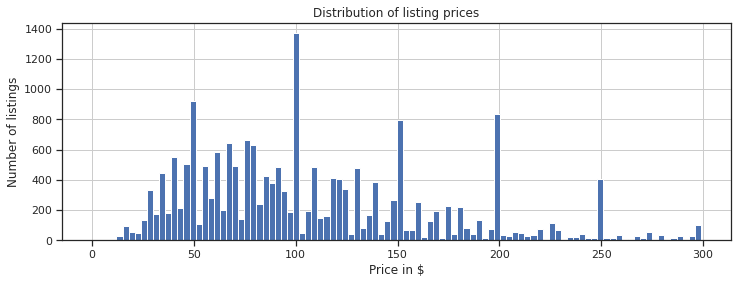

In [ ]:
# Distribution of listing prices

plt.figure(figsize=(12,4))
df.loc[(df['price'] <= 500) ]['price'].hist(bins=100)
plt.ylabel('Number of listings')
plt.xlabel('Price in $')
plt.title('Distribution of listing prices');

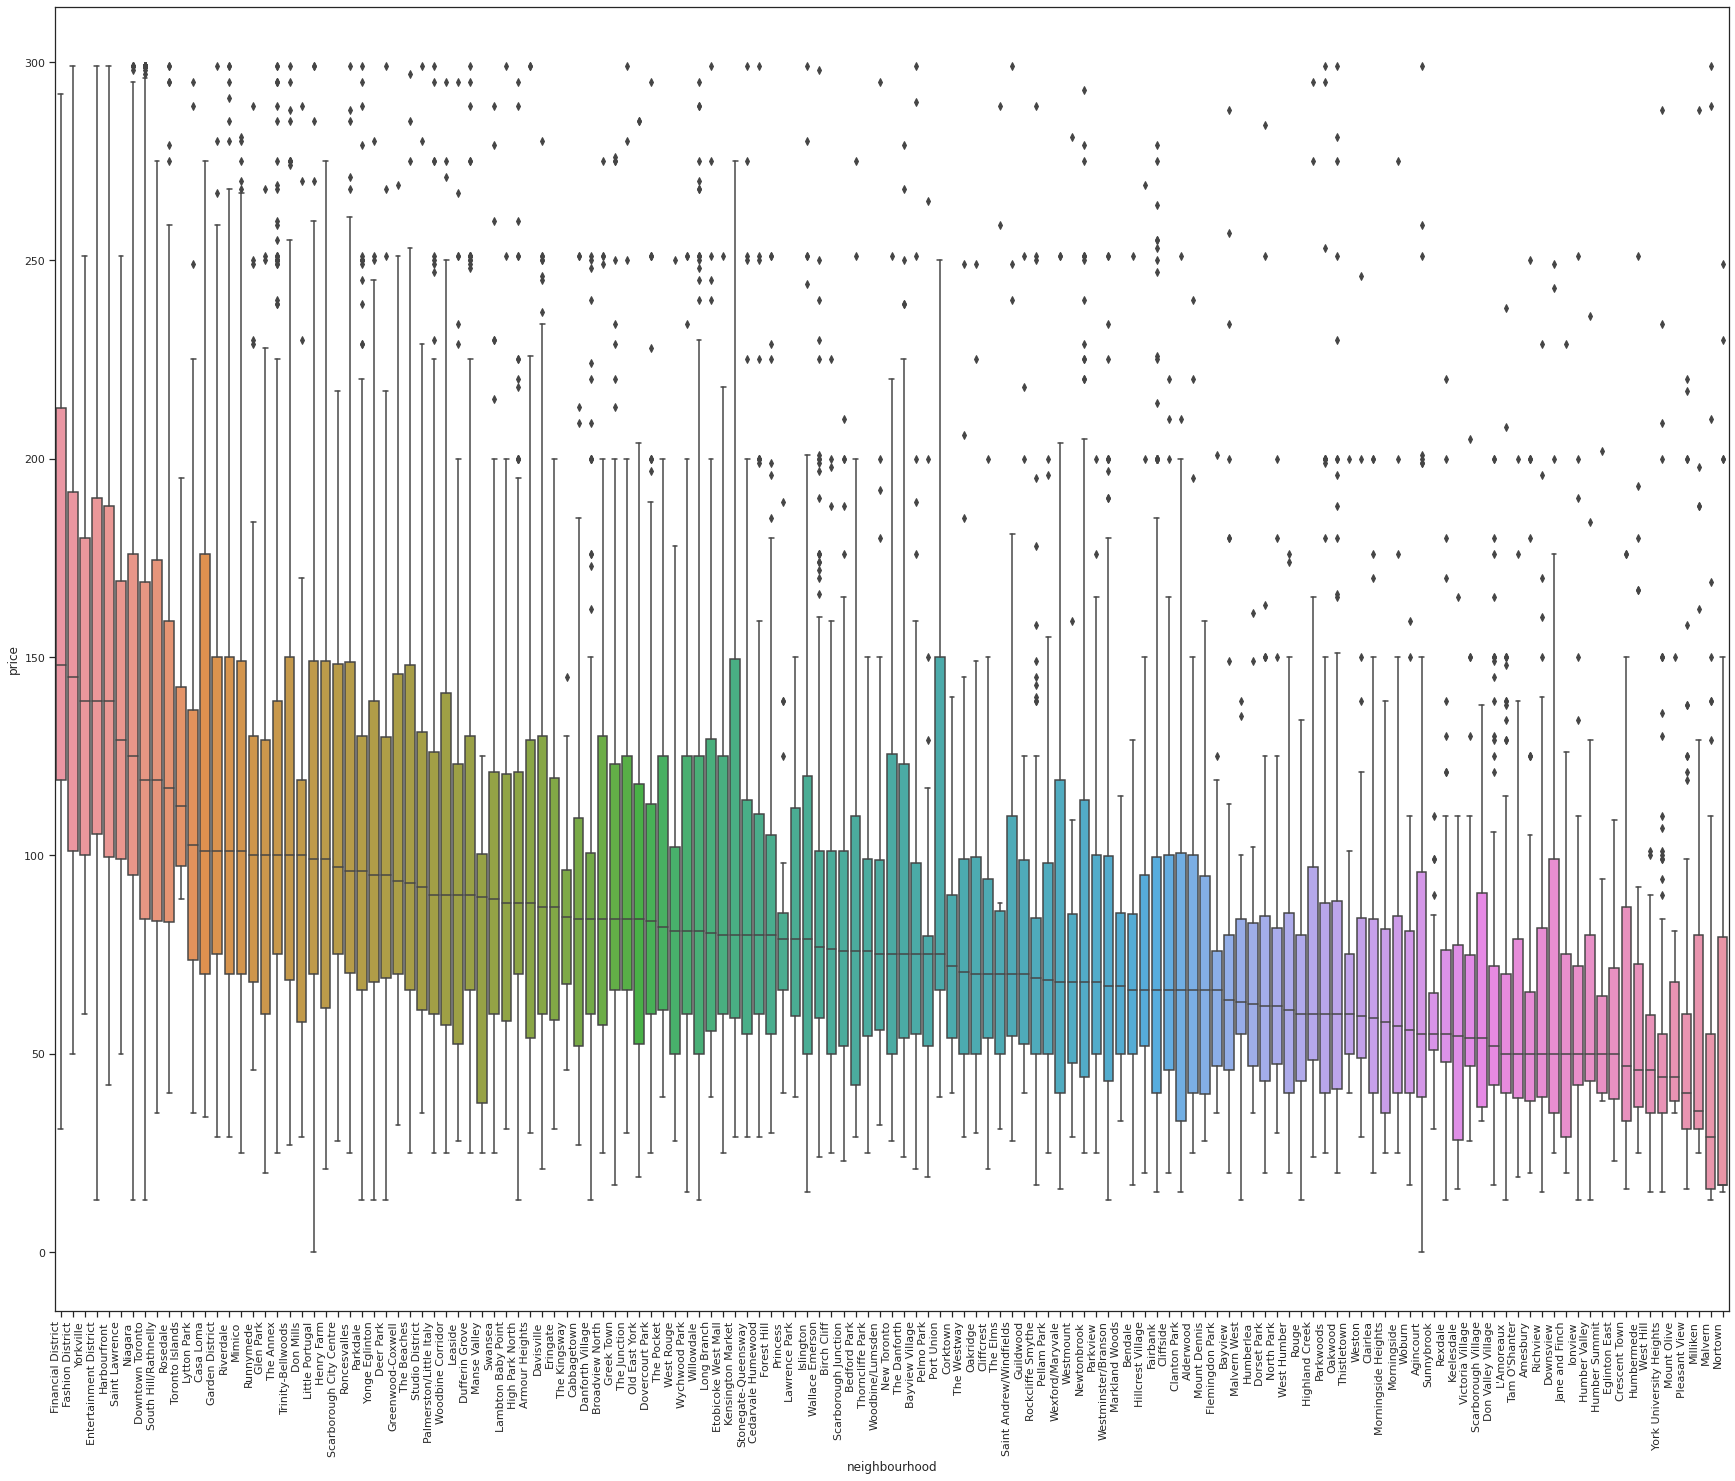

In [ ]:
#Average price of each neighbouhood

plt.figure(figsize=(30,24))
sort_price = df.loc[(df['price'] <= 500)].groupby('neighbourhood')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='neighbourhood', data=df.loc[(df['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

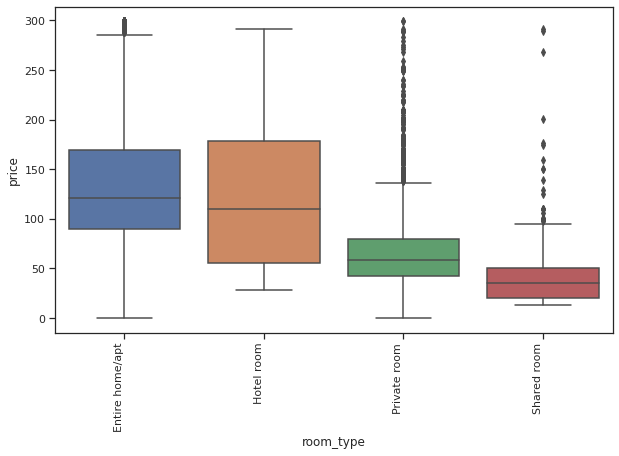

In [ ]:
# Room type vs price
plt.figure(figsize=(10,6))
sort_price = df.loc[(df['price'] <= 500)].groupby('room_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='room_type', data=df.loc[(df['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

### Toronto Airbnb Heat Map

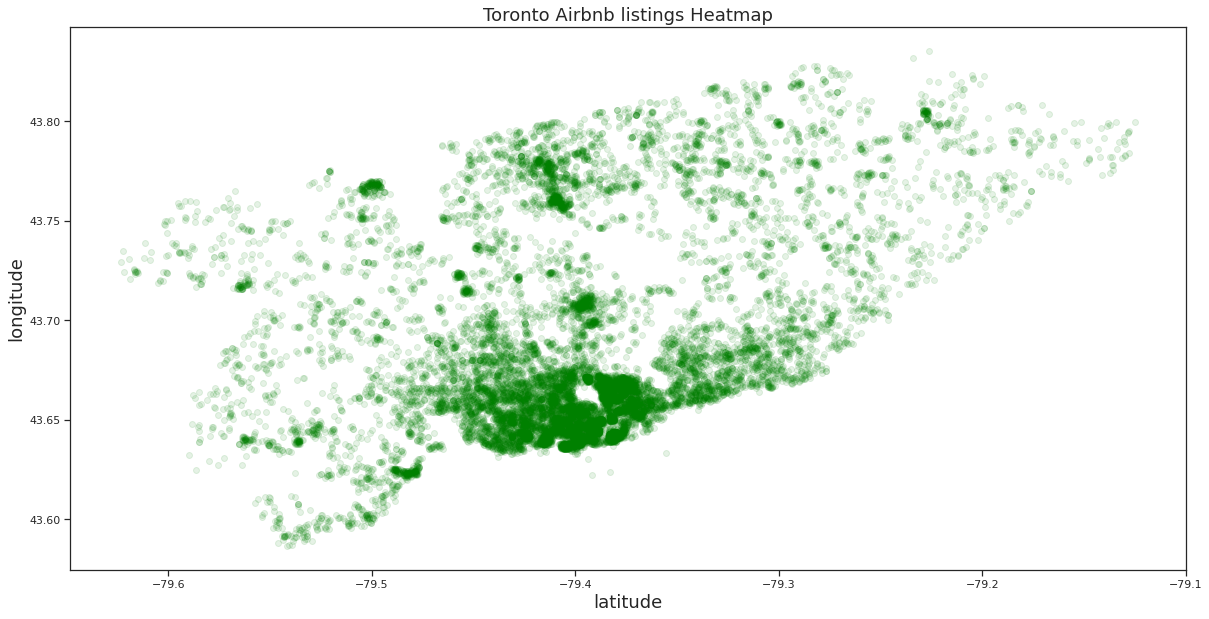

In [ ]:
# Toronto Airbnb listings number Heat Map

plt.figure(figsize=(20,10))
plt.scatter(df['longitude'], df['latitude'], c='green', alpha=0.1)
plt.ylabel('longitude', fontsize=18)
plt.xlabel('latitude', fontsize=18)
plt.title('Toronto Airbnb listings Heatmap', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Toronto Airbnb Price Heatmap')

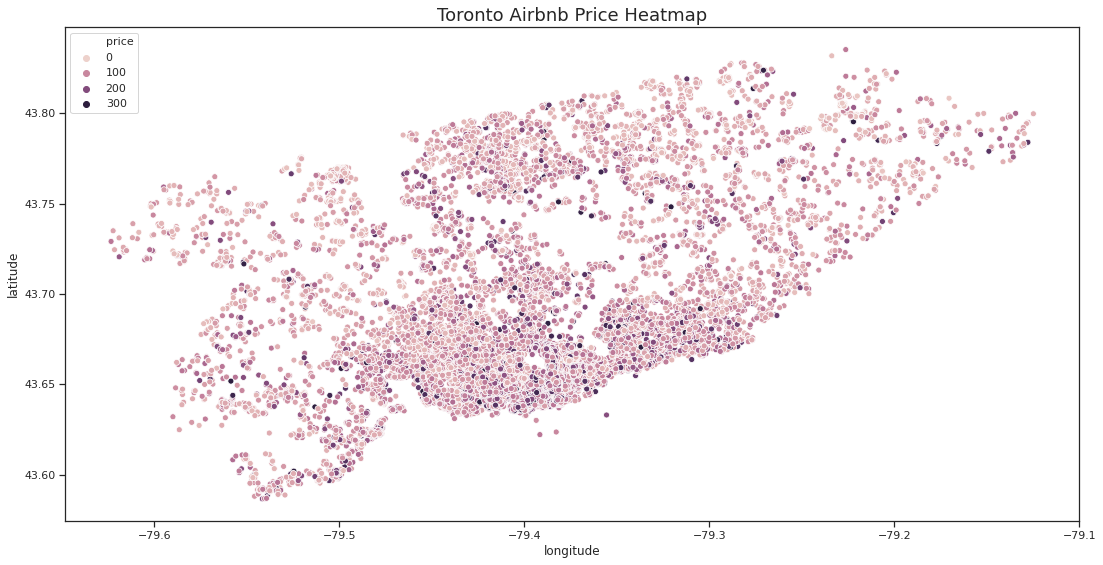

In [ ]:
fig=plt.figure(4,figsize=(40,20))
ax1=fig.add_subplot(2,2,1)
sns.scatterplot(x='latitude' , y= 'longitude', hue = 'price', data = df[df.price < 500], ax=ax1)
plt.title('Toronto Airbnb Price Heatmap', fontsize=18)

### The seasonality of price

In [ ]:
# Read calendar.csv file from internet

calendar = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-06-08/data/calendar.csv.gz")

calendar.head(1)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,28246537,2020-06-08,f,$250.00,$250.00,2.0,1125.0


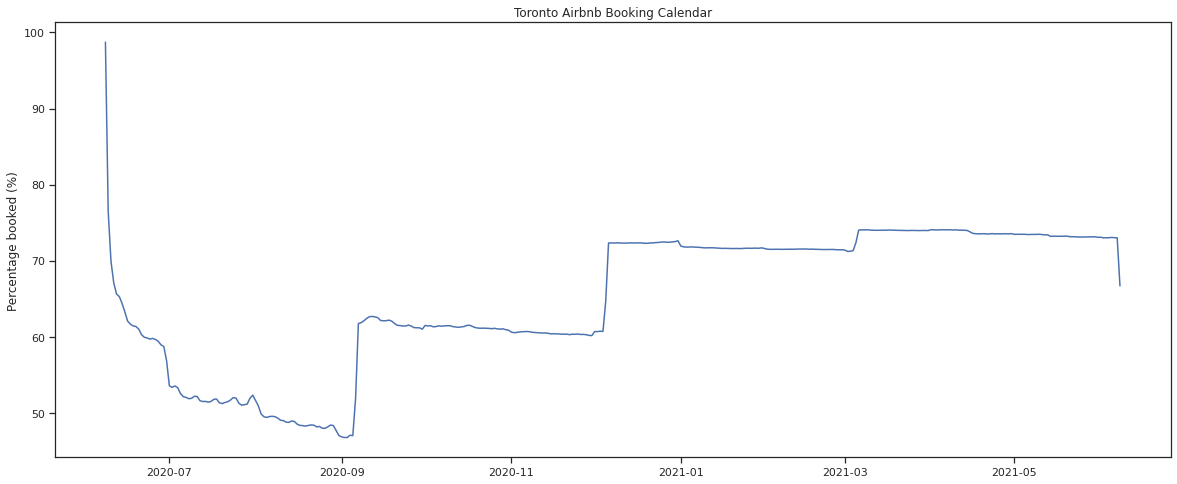

In [ ]:
# Airbnb Booking Calendar

calendar = calendar.append(pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-06-08/data/calendar.csv.gz"),sort=True)

calendarTS = calendar.loc[:,['date', 'available']]
calendarTS['booked'] = calendarTS.available.map( lambda x: 0 if x == 't' else 1)
calendarTS = calendarTS.groupby('date')['booked'].sum().reset_index()
cal_temp = calendar[['date','available']]
cal_temp = cal_temp.groupby('date').count().reset_index()

calendarTS['date'] = pd.to_datetime(calendarTS['date'])
calendarTS['%age booked'] = (calendarTS['booked']/cal_temp['available'])*100

calendarTS.index = pd.to_datetime(calendarTS.date)

plt.figure(figsize=(20, 8))
plt.plot(calendarTS['%age booked'])
plt.title('Toronto Airbnb Booking Calendar')
plt.ylabel('Percentage booked (%)')
plt.show();

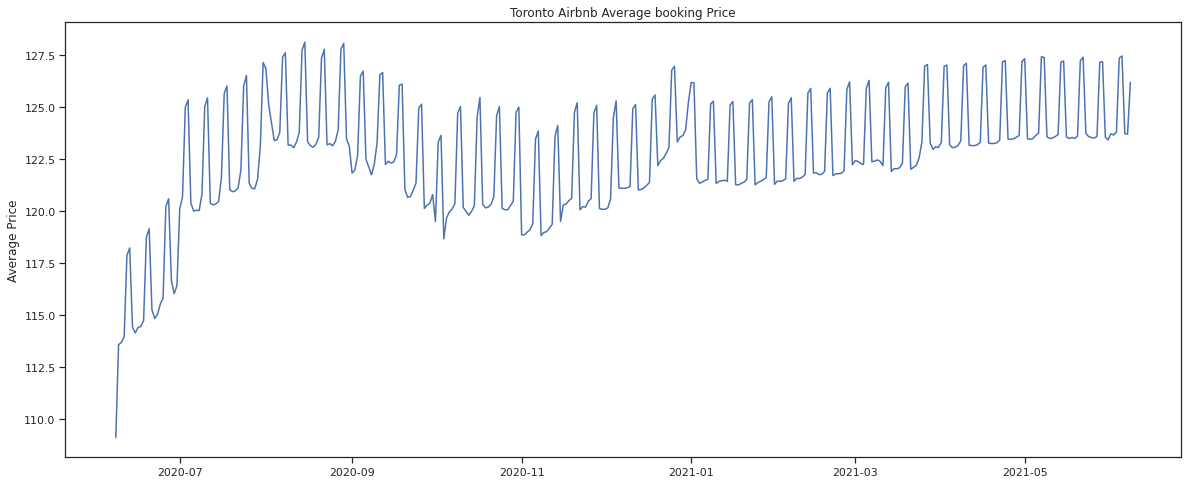

In [ ]:
# Airbnb average booking price

calendarTSA = calendar.loc[:,['date', 'available','price']]
calendarTSA.dropna(inplace = True)
calendarTSA['booked'] = calendarTSA.available.map( lambda x: 0 if x == 't' else 1)
calendarTSA['price'] = calendarTSA['price'].apply(lambda x: x.replace('$','').replace(',',''))
calendarTSA.drop(columns = 'available',inplace=True)
calendarTSA = calendarTSA.astype({'price':'float'})
calendarTSA = calendarTSA.loc[calendarTSA['price']< 500]
calendarTSA.index = pd.to_datetime(calendarTSA.date)
calendarTSA.drop(columns='date',inplace=True)
calendarTSA_AvgPrice = calendarTSA.groupby(['date'])['price'].mean().reset_index()
calendarTSA_AvgPrice.index = pd.to_datetime(calendarTSA_AvgPrice.date)
#calendar_booking.info()

plt.figure(figsize=(20, 8))
plt.plot(calendarTSA_AvgPrice['price'])

plt.title('Toronto Airbnb Average booking Price')
plt.ylabel('Average Price')

plt.show();